In [187]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [188]:
env_name = "Taxi-v3"
epsilon = 1
decay_rate = 0.001
min_epsilon = 0.01
max_episodes = 2500
print_interval = 50
test_episodes = 2
lr = 0.4
gamma = 0.99

In [189]:
env = gym.make(env_name)
n_states = env.observation_space.n
n_actions = env.action_space.n
print(f"Number of states: {n_states}\n"
      f"Number of actions: {n_actions}")

Number of states: 500
Number of actions: 6


In [190]:
q_table = np.zeros((n_states, n_actions))

In [191]:
def choose_action(state):
    global q_table
    if epsilon > np.random.uniform():
        action = env.action_space.sample()
    else:
        action = np.argmax(q_table[state, :])
    return action

In [192]:
def update_table(state, action, reward, done, next_state):
    global q_table
    q_table[state, action] += lr * (reward + gamma * np.max(q_table[next_state, :]) * (1 - done) - q_table[state, action])

In [193]:
running_reward = []
for episode in range(1, 1 + max_episodes):
    state = env.reset()
    done = False  
    episode_reward = 0
    while not done:
        action = choose_action(state)
        next_state, reward, done, _ = env.step(action)
        update_table(state, action, reward, done, next_state)
        
        episode_reward += reward
        if done:
            break
        state = next_state
            
    epsilon  = epsilon - decay_rate if epsilon - decay_rate > min_epsilon else min_epsilon
    
    if episode == 1:
        running_reward.append(episode_reward)
    else:
        running_reward.append(0.99 * running_reward[-1] + 0.01 * episode_reward)
    if episode % print_interval == 0:
        print(f"Ep:{episode}| "
              f"Ep_reward:{episode_reward}| "
              f"Running_reward:{running_reward[-1]:.3f}| "
             f"Epsilon:{epsilon:.3f}| ")

Ep:50| Ep_reward:-659| Running_reward:-708.306| Epsilon:0.950| 
Ep:100| Ep_reward:-803| Running_reward:-707.127| Epsilon:0.900| 
Ep:150| Ep_reward:-132| Running_reward:-660.334| Epsilon:0.850| 
Ep:200| Ep_reward:-794| Running_reward:-626.650| Epsilon:0.800| 
Ep:250| Ep_reward:-140| Running_reward:-513.314| Epsilon:0.750| 
Ep:300| Ep_reward:-164| Running_reward:-417.621| Epsilon:0.700| 
Ep:350| Ep_reward:-36| Running_reward:-323.219| Epsilon:0.650| 
Ep:400| Ep_reward:-83| Running_reward:-239.855| Epsilon:0.600| 
Ep:450| Ep_reward:-74| Running_reward:-179.692| Epsilon:0.550| 
Ep:500| Ep_reward:-6| Running_reward:-133.356| Epsilon:0.500| 
Ep:550| Ep_reward:-18| Running_reward:-99.936| Epsilon:0.450| 
Ep:600| Ep_reward:-11| Running_reward:-72.787| Epsilon:0.400| 
Ep:650| Ep_reward:-48| Running_reward:-56.394| Epsilon:0.350| 
Ep:700| Ep_reward:-25| Running_reward:-42.128| Epsilon:0.300| 
Ep:750| Ep_reward:-15| Running_reward:-30.326| Epsilon:0.250| 
Ep:800| Ep_reward:7| Running_reward:-19.1

Text(0.5, 1.0, 'Running_reward')

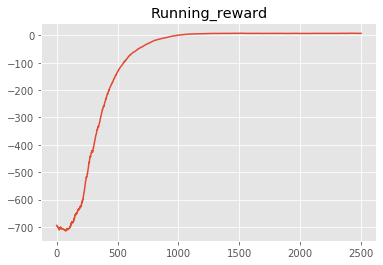

In [194]:
plt.figure()
plt.style.use("ggplot")
plt.plot(np.arange(max_episodes), running_reward)
plt.title("Running_reward")

In [196]:
for episode in range(1, 1 + test_episodes):
    state = env.reset()
    done = False  
    episode_reward = 0
    while not done:
        action = choose_action(state)
        next_state, reward, done, _ = env.step(action)
        env.render()
        episode_reward += reward
        if done:
            break
        state = next_state

    print(f"Ep:{episode}| "
          f"Ep_reward:{episode_reward}| ")

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| :_| : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Ep:1| Ep_reward:11| 
+---------+
|R: | : :G|
| : | : : |
| : 